<a href="https://colab.research.google.com/github/iam-abbas/Forest-Fires-Prediction/blob/master/Australian_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualization of Australian Fires (2019-20)**
- Australia has faced worst summer in 2019 (45C)
- Due to lack of rains (IOD) land remained dry
- Fire started through natural causes

### Import visualizatiion libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins

### Reading data from one of the satellite

In [2]:
df = pd.read_csv('fire_archive_M6_101673.csv')
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-12.3168,142.0542,311.4,4.2,1.9,2019-09-01,14,Terra,MODIS,23,6.3,297.0,40.2,D,0
1,-12.3407,142.0894,310.2,4.2,1.9,2019-09-01,14,Terra,MODIS,18,6.3,296.9,33.5,D,0
2,-12.3266,142.0863,310.1,4.2,1.9,2019-09-01,14,Terra,MODIS,27,6.3,296.7,36.0,D,0
3,-12.6649,142.6015,310.4,3.8,1.8,2019-09-01,14,Terra,MODIS,35,6.3,298.1,28.2,D,0
4,-12.8706,142.7663,314.3,3.6,1.8,2019-09-01,14,Terra,MODIS,56,6.3,299.4,43.5,D,0


### Only consider data with 100% confidence and get rif od unncessary data
- Since it was summer there was lot of noise in Data. So only considering data with 100% confidence

In [0]:
df = df.loc[df['confidence'] == 100]
df = df.drop(columns=['instrument', 'version', 'confidence', 'type'])

### Show data histograms to ensure there is no visual bias

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5481db9908>,
      dtype=object)

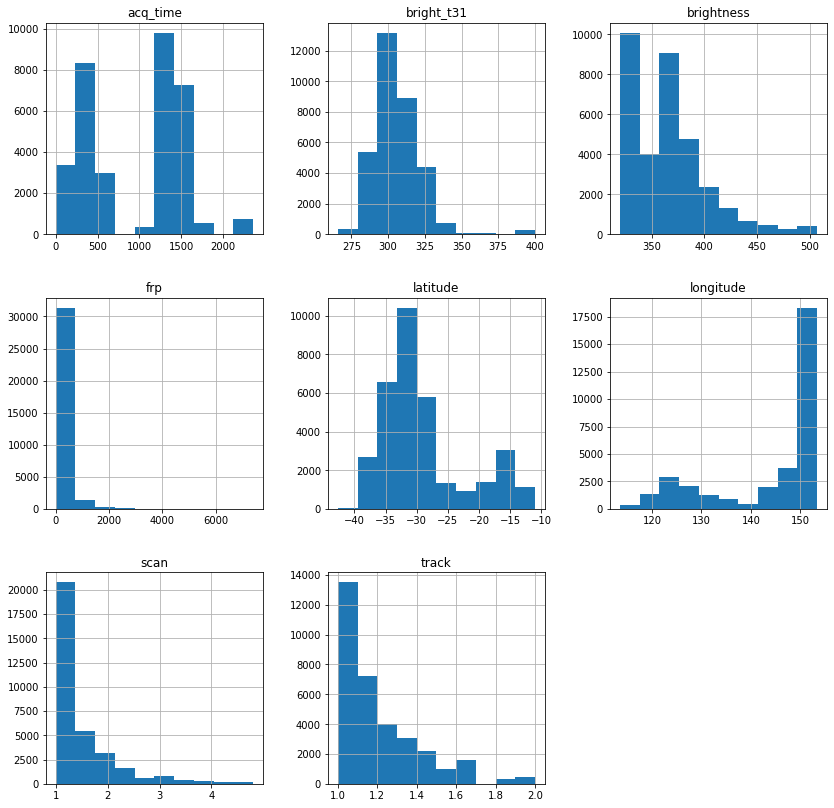

In [4]:
df.hist(figsize=(14, 14))

### Plot Timeline of the Fires

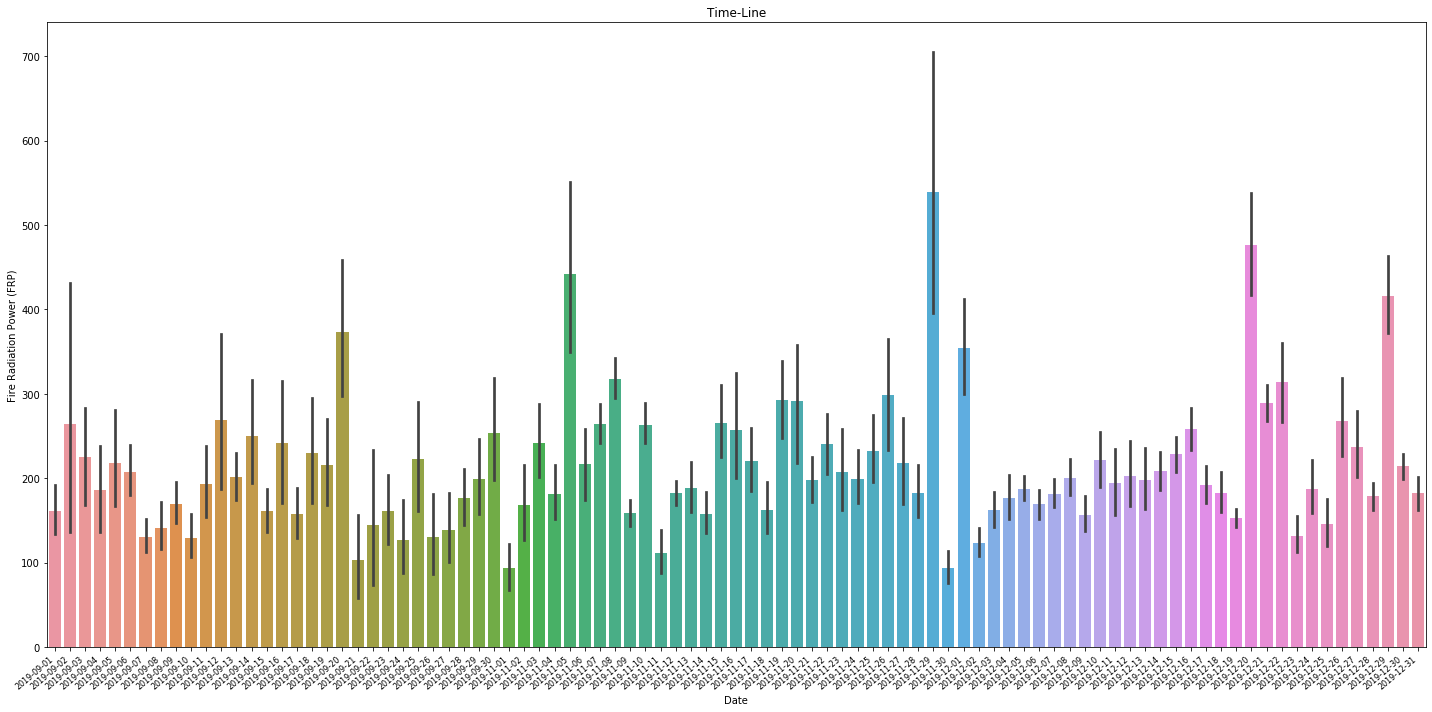

In [5]:
plt.figure(figsize=(20,10))
sns.set_palette("pastel")
ax = sns.barplot(x='acq_date',y='frp',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.xlabel("Date")
plt.ylabel('Fire Radiation Power (FRP)')
plt.title("Time-Line")
plt.tight_layout()

### Get Australian Map using Folium

In [0]:
def aus_map(zoom=5):
  map = folium.Map(location=[-26.865143, 133.209900], control_scale=True, zoom_start=zoom)
  return map

In [7]:
heat_data = df.copy()
heat_data = heat_data[['latitude', 'longitude', 'brightness']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist()
print("Total No. of Rows:", len(heat_data))

Total No. of Rows: 33371


### Most valuable visualization. See the affected area using heatmaps

In [8]:
heat_map = aus_map()
plugins.HeatMap(data=heat_data).add_to(heat_map)
heat_map

### Segment the data based on each date to get timeline of data

In [9]:
date_df = df[['latitude', 'longitude', 'brightness', 'acq_date']].groupby(['latitude', 'longitude', 'acq_date']).sum().reset_index()
date_df.info()
date_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33371 entries, 0 to 33370
Data columns (total 4 columns):
latitude      33371 non-null float64
longitude     33371 non-null float64
acq_date      33371 non-null object
brightness    33371 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


,latitude,longitude,acq_date,brightness
0,-42.6713,145.5778,2019-09-19,406.7
1,-42.6640,145.5632,2019-09-19,407.3
2,-42.6623,145.5755,2019-09-19,400.5
3,-42.6566,145.5485,2019-09-19,367.0
4,-42.6549,145.5608,2019-09-19,364.1


### Prepare data for Heatmap with Time

In [10]:
time_data = []
for date_ in date_df.acq_date.sort_values().unique():
  time_data.append(date_df.loc[date_df.acq_date == date_, ['latitude', 'longitude', 'brightness']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())
print("Total No. of Days:", len(time_data))

Total No. of Days: 91


### Plot live heatmap along timeline

In [11]:
time_map = aus_map(5)
plugins.HeatMapWithTime(time_data, auto_play=True).add_to(time_map)
time_map

## Findinings
- Fire was concentrated at **Urban areas** (Sydney, Melbourne, Perth)
  - Maybe human activity influenced it?
- November and December were the worst
- Huge part of central Australia was unaffected ecen though it has huge forests. This one is weird.
- Fires is **Tasmania** did not spread despite of having over 90% of forest area.
- Forests near **brisbane** burned more than **twice**? what?
- Forests near sydney, Melbourne etc, burnt towards the end